Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jiyang Tang"
COLLABORATORS = "Bolin Song and Linxi Li"

---

final-project, STATS102 Fall2018 Session 2, Duke Kunshan University, Due at Oct 21th 23:59pm Shanghai time
![](dku.jpg)
For this problem set, we'll be using the Jupyter notebook:
![](jupyter.png) 


Dear Students,

This is your final project report! Please try to update your final data files and codes to this server and make sure you can run your experiments on this course cloud.

The final project presentation is scheduled at Dec 20th noon from 12:00pm to 2:pm at DKU water pavilion .
Each group needs to print your own poster before the presentation session, and also bring one laptop to the poster session just in case you want to show your code and results. Poster board will be provided. The size of the board is 75cm*80cm. 

Thanks a lot for taking this course.
Look forward to all your wonderful presentations on Dec 20th noon.

Best

Ming


# Background:
Powerlifting is a sport with long history, powerlifting athletes raise the barbells over their head. The weight of the barbell that successfully raised over head is the indicator of judging how good the grade is. However, the weight, sex, age, equipment of athletes highly affect the grade their can get. As a result, those factors can maybe used to predict athletes' grade.


# Introduction
The aim of this project is to predict powerlifting sports based on testers' body and age features, by using neural networks and three regression models.

# Data
## Overview
The Dataset we use is retrieved from [Kaggle](https://www.kaggle.com/open-powerlifting/powerlifting-database), containing $386,415$ rows and $17$ columns in total. However, some data like `Squat4Kg`, `Bench4kg`, `DeadliftKg` contain too many N/As, and they can not represent the maximum capability of an athlete. Thus, we drop those three columns. The target variables are then BestBenchKg, BestSquatKg, BestDeadliftKg. Next are some standard procedures: drop rows that have N/As and duplicates. However, we found that there are negative numbers where they should not be, such as in BestSquatKg, BestBenchKg and BestDeadliftKg. So we decided to drop those rows as well.
After cleaning, the dataset now contains 96,718 rows.
## Wilks
`Wilks` is a metric measuring the strength of a powerlifter against other powerlifters regardless of the different weights classes. The formula is 
$$ \frac{500}{a + bx + cx^2 + dx^3+ex^4+fx^5} $$
where $x$ is the body weight of the lifter in kilograms and $a$ to $f$ are empirical-defined constants.
Their values for men are:

$a=-216.0475144$

$b=16.2606339$

$c=-0.002388645$

$d=-0.00113732$

$e=7.01863E-06$

$f=-1.291E-08$


Their values for women are:

$a=594.31747775582$

$b=-27.23842536447$

$c=0.82112226871$

$d=-0.00930733913$

$e=4.731582E-05$

$f=-9.054E-08 $


## Encode
Next, we encode strings into numbers so that the machine learning models can do regression on them. For example, 1 stands for male and 0 stands for female.

In [2]:
import pandas as pd
import numpy as np
url = 'openpowerlifting.csv'
data = pd.read_csv(url)
data.drop(["Squat4Kg","Bench4Kg","Deadlift4Kg"],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
display(data.head())
display(data.describe())

data_cleaned = data[(data['BestSquatKg'] > 0)&(data['BestBenchKg']>0)&(data['BestDeadliftKg']> 0)]
# encode
data_cleaned=data_cleaned.dropna()
data_cleaned['Sex'] = data_cleaned['Sex'].map( {'M':1, 'F':0} )
# encode
from sklearn.preprocessing import LabelEncoder
data_cleaned['Equipment'] = LabelEncoder().fit_transform(data_cleaned['Equipment'])
data_cleaned['WeightClassKg'] = LabelEncoder().fit_transform(data_cleaned['WeightClassKg'])

data_cleaned.describe()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,95.25,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47


,MeetID,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks
count,385869.000000,147028.000000,383470.000000,297905.000000,355925.000000,317447.000000,362797.000000,361754.000000
mean,5144.518326,31.665292,86.928824,176.551997,118.336628,195.038527,424.060625,301.134531
std,2551.532044,12.898242,23.138102,69.190264,54.843991,61.567345,196.317720,116.333631
min,0.000000,5.000000,15.880000,-477.500000,-522.500000,-410.000000,11.000000,13.730000
25%,2990.000000,22.000000,70.300000,127.500000,79.380000,147.500000,272.500000,237.570000
50%,5961.000000,28.000000,83.190000,174.630000,115.000000,195.000000,424.110000,319.720000
75%,7176.000000,39.000000,100.000000,217.720000,150.000000,238.140000,565.000000,379.320000
max,8481.000000,95.000000,242.400000,573.790000,488.500000,460.400000,1365.310000,779.380000


,MeetID,Sex,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks
count,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000
mean,6177.728910,0.679467,1.527477,29.907219,85.437244,24.439023,178.111797,116.515698,200.686586,495.313166,358.852828
std,2694.723747,0.466684,0.853187,11.946703,22.862687,14.550115,67.953002,50.111185,61.689678,173.593622,76.736731
min,0.000000,0.000000,0.000000,7.000000,24.100000,0.000000,13.600000,6.800000,12.000000,38.600000,28.230000
25%,5717.000000,0.000000,1.000000,21.500000,67.800000,8.000000,124.740000,72.500000,149.690000,347.500000,308.140000
50%,7312.000000,1.000000,1.000000,26.000000,82.070000,29.000000,175.000000,115.000000,202.500000,498.950000,356.990000
75%,7977.000000,1.000000,2.000000,36.000000,98.970000,36.000000,222.500000,150.000000,247.500000,617.500000,406.610000
max,8462.000000,1.000000,3.000000,93.000000,230.800000,44.000000,548.850000,442.250000,440.000000,1363.050000,779.380000


## Visualization
Before we started constructing machine learning models, we wanted to have an intuitive impression on the relationship between feature- and outcome variables, the pair plot shows that some features have rather obvious positive correlation while some don’t. Also, the correlation matrix visualized as a heatmap shows the possible relationship between features, the deeper the green color is, the closer the correlation coefficient is to 1. The deeper the red color is, the closer the correlation coefficient is to -1.

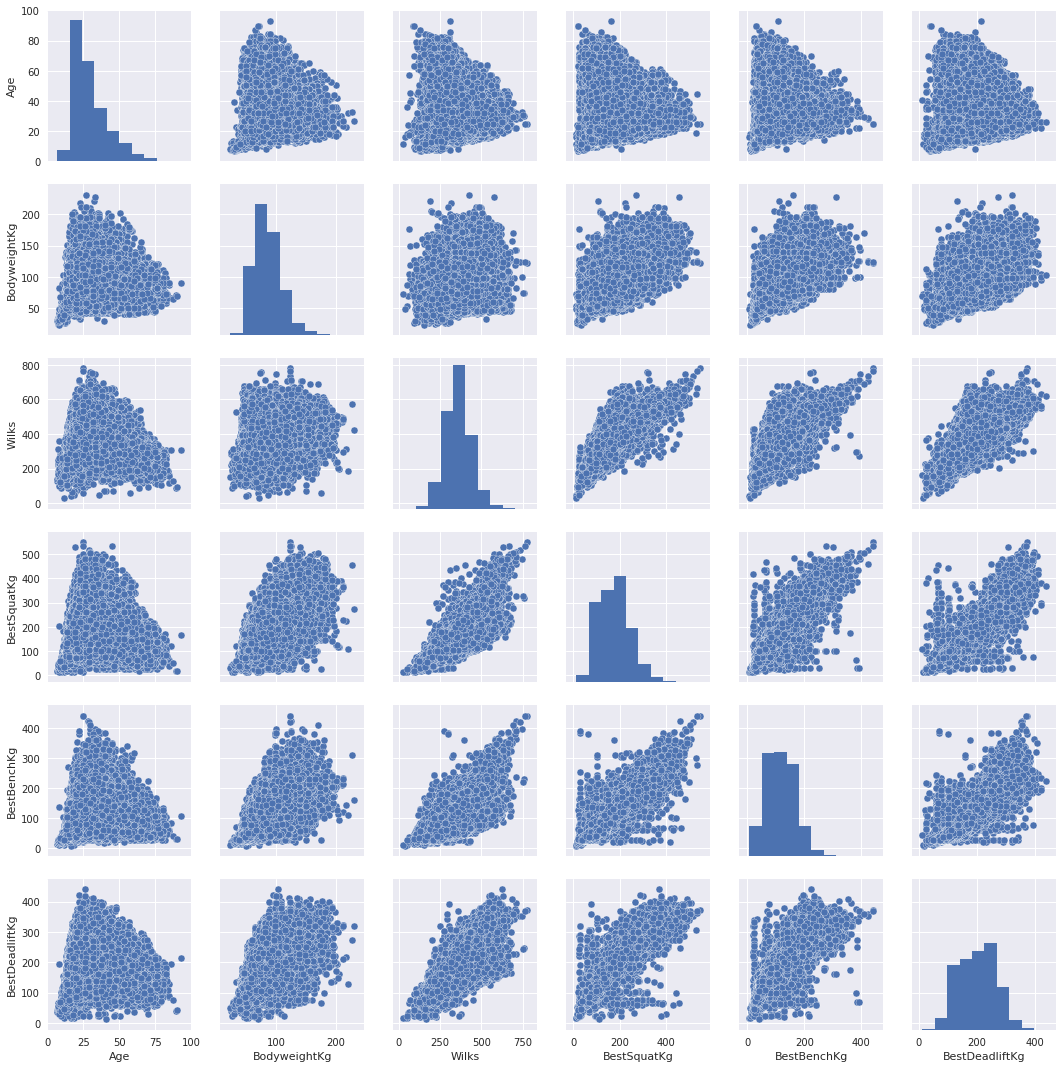

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.pairplot(data_cleaned[['Age','BodyweightKg','Wilks','BestSquatKg','BestBenchKg','BestDeadliftKg']])

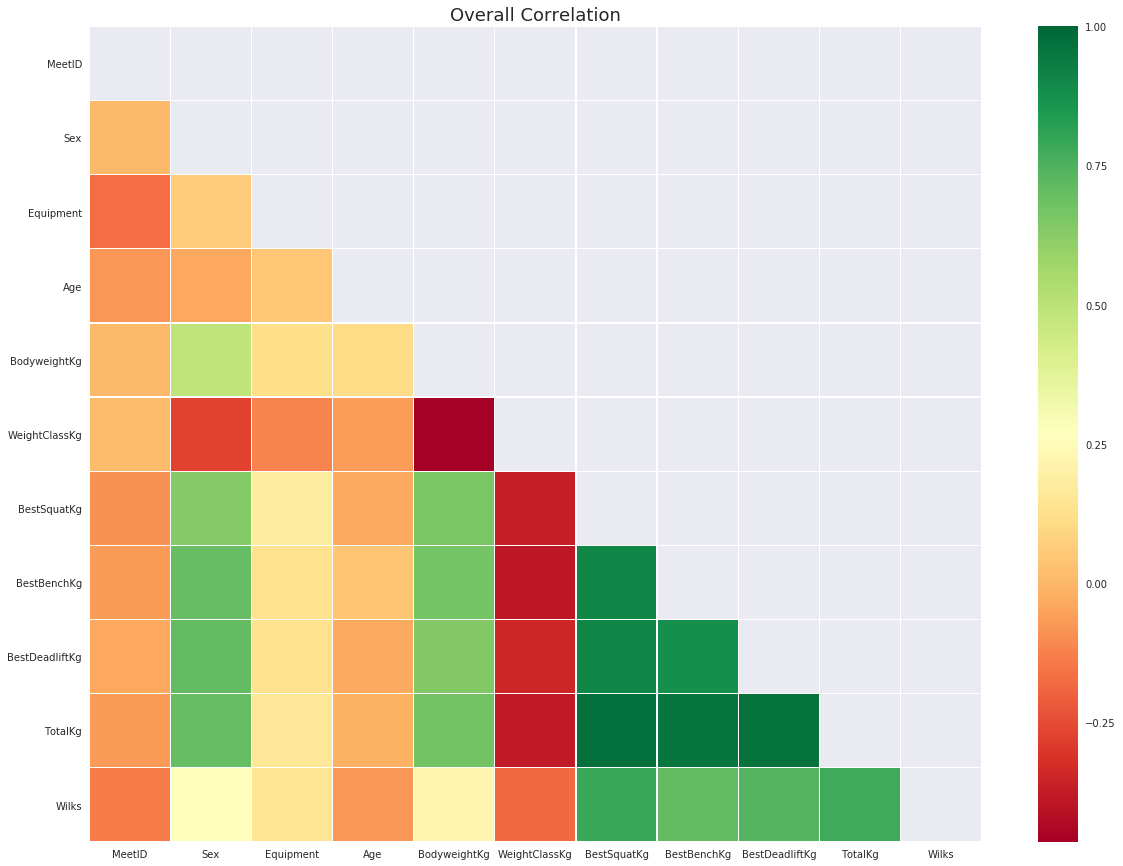

In [4]:
import numpy as np
from scipy import stats
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns;sns.set();

# Initiate correlation matrix
corr = data_cleaned.corr()
# Set-up mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set-up figure
plt.figure(figsize=(20, 15))
plt.title('Overall Correlation', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})

Because linear regression assumes that the distribution of the residuals are normal distributed, we might want to transform our data using log transformation. To find the how our data looks like comparing to a standard normal distribution, we used Probability Plots. The blue points are the data points, while the red straight line is the line of the normal distribution. Meanwhile, we also drew some Distribution Plots. From the graphs we can see that the distribution of our data is close to the normal distribution, but slightly right-skewed.

However, by transforming the data, the accuracy of regression models actually droped, especially for neural network. So we abandoned this method.

/home/temp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/temp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/temp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/temp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


"\n# distplot after transformation\nfig,ax = plt.subplots(1,6)\nfig.set_size_inches(30, 15)\nsns.distplot(data_final['BestSquatKg'],ax=ax[0])\nsns.distplot(data_final['BestBenchKg'],ax=ax[1])\nsns.distplot(data_final['BestDeadliftKg'],ax=ax[2])\nsns.distplot(data_final['Age'],ax=ax[3])\nsns.distplot(data_final['BodyweightKg'],ax=ax[4])\nsns.distplot(data_final['Wilks'],ax=ax[5])\n\n# qqplot after transformation\nqq_fig,qq_ax = plt.subplots(1,6)\nqq_fig.set_size_inches(30, 15)\nstats.probplot(data_final['BestSquatKg'], plot=qq_ax[0])\nstats.probplot(data_final['BestBenchKg'], plot=qq_ax[1])\nstats.probplot(data_final['BestDeadliftKg'], plot=qq_ax[2])\nstats.probplot(data_final['Age'], plot=qq_ax[3])\nstats.probplot(data_final['BodyweightKg'], plot=qq_ax[4])\nstats.probplot(data_final['Wilks'], plot=qq_ax[5])\n"

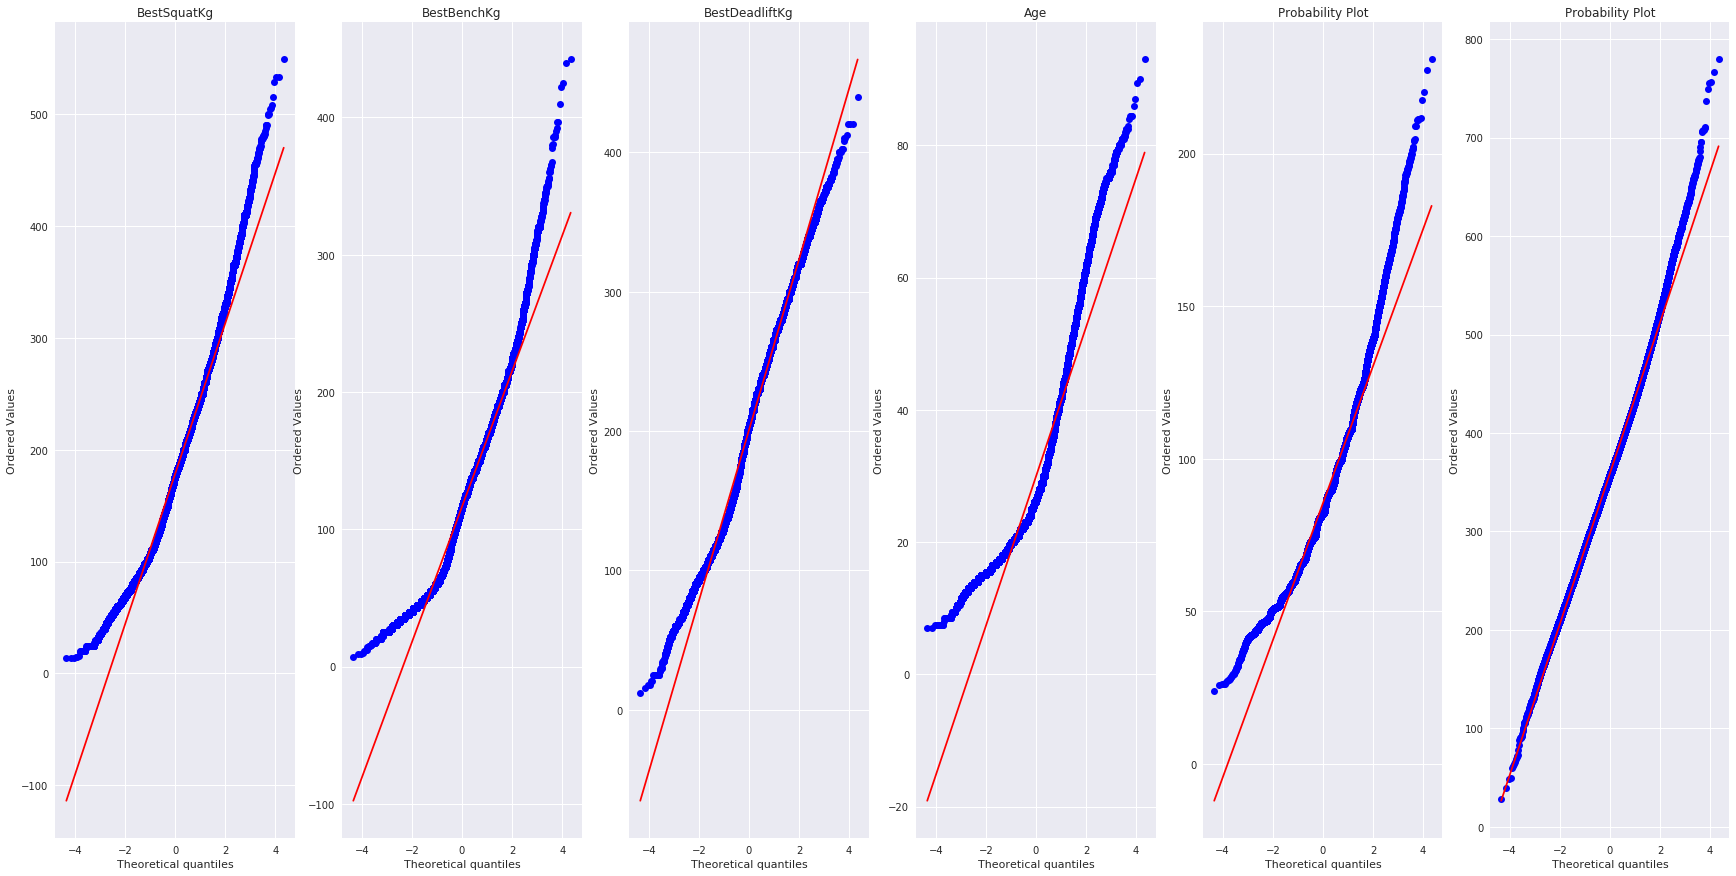

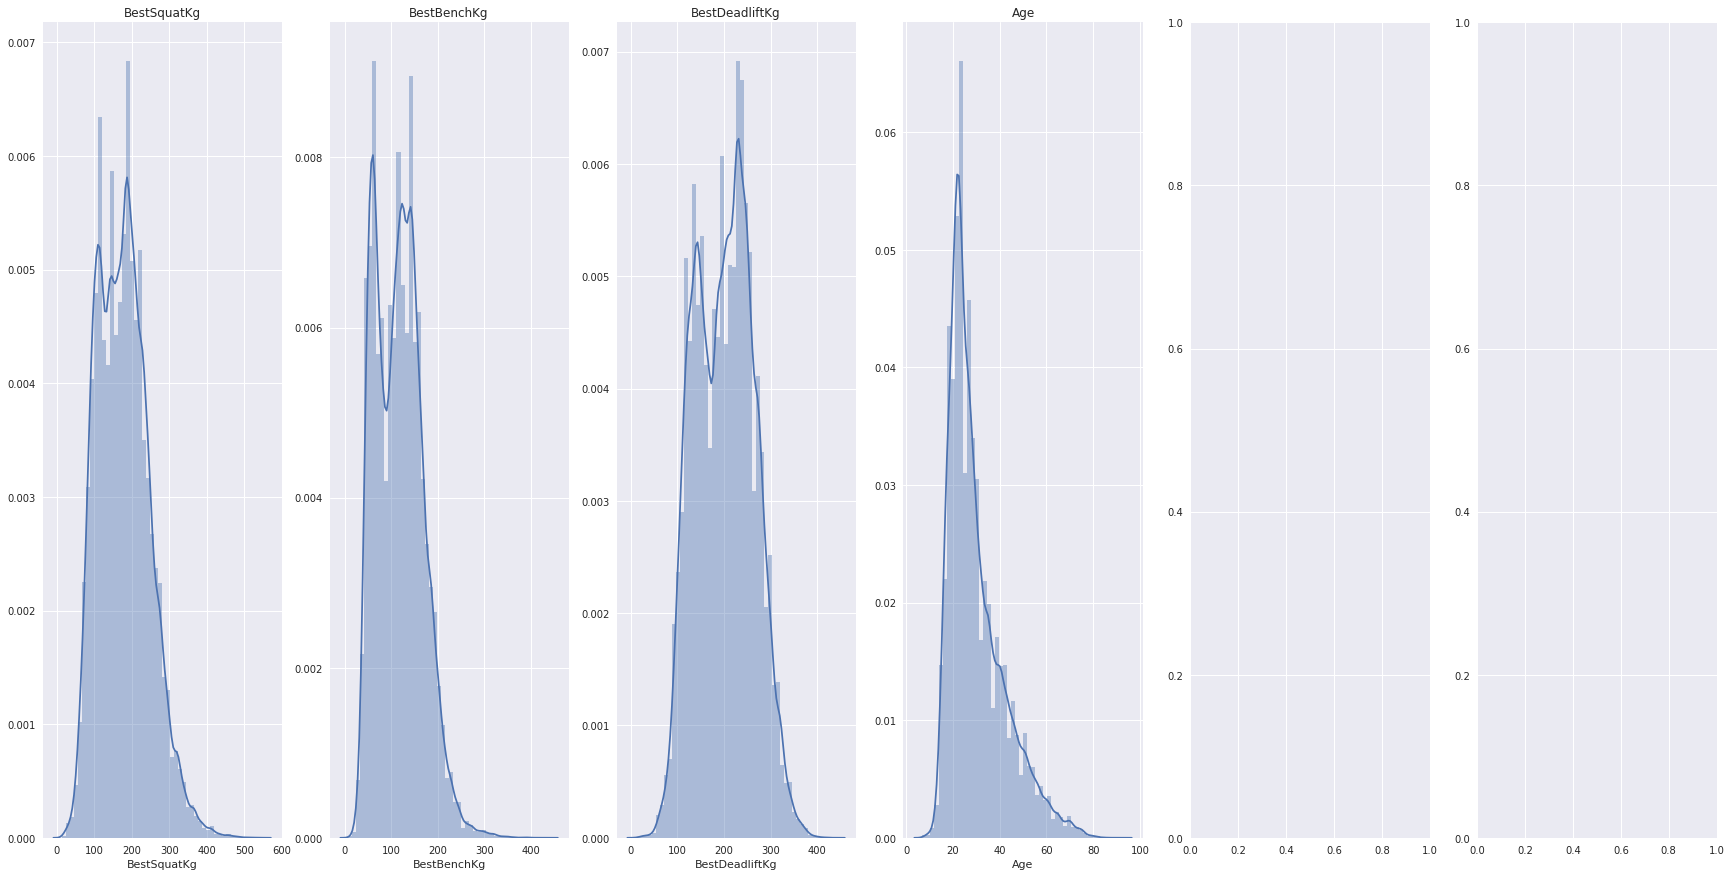

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set();
import statsmodels.api as sm
from scipy import stats

# qqplot
qq_fig,qq_ax = plt.subplots(1,6)
qq_fig.set_size_inches(30, 15)

stats.probplot(data_cleaned['BestSquatKg'], plot=qq_ax[0])
stats.probplot(data_cleaned['BestBenchKg'], plot=qq_ax[1])
stats.probplot(data_cleaned['BestDeadliftKg'], plot=qq_ax[2])
stats.probplot(data_cleaned['Age'], plot=qq_ax[3])
stats.probplot(data_cleaned['BodyweightKg'], plot=qq_ax[4])
stats.probplot(data_cleaned['Wilks'], plot=qq_ax[5])

qq_ax[0].set_title("BestSquatKg")
qq_ax[1].set_title("BestBenchKg")
qq_ax[2].set_title("BestDeadliftKg")
qq_ax[3].set_title("Age")
# distplot before transformation
fig,ax = plt.subplots(1,6)
fig.set_size_inches(30, 15)
sns.distplot(data_cleaned['BestSquatKg'],ax=ax[0])
ax[0].set_title("BestSquatKg")
ax[1].set_title("BestBenchKg")
ax[2].set_title("BestDeadliftKg")
ax[3].set_title("Age")

sns.distplot(data_cleaned['BestBenchKg'],ax=ax[1])
sns.distplot(data_cleaned['BestDeadliftKg'],ax=ax[2])
sns.distplot(data_cleaned['Age'],ax=ax[3])
# Applying boxcox transformation
data_final = data_cleaned.copy()
"""
if transform using boxcox, the accuracy of regression gets lower, so we abandoned this method
"""
# remember to transform it back when predicting!
#lambs = np.zeros(6)
#data_final["BestSquatKg"],lambs[0] = stats.boxcox(data_cleaned["BestSquatKg"])
#data_final["BestBenchKg"],lambs[1] = stats.boxcox(data_cleaned["BestBenchKg"])
#data_final["BestDeadliftKg"],lambs[2] = stats.boxcox(data_cleaned["BestDeadliftKg"])
#data_final["Age"],lambs[3] = stats.boxcox(data_cleaned["Age"])
#data_final["Wilks"],lambs[4] = stats.boxcox(data_cleaned["Wilks"])
#data_final["BodyweightKg"],lambs[5] = stats.boxcox(data_cleaned["Wilks"])

"""
# distplot after transformation
fig,ax = plt.subplots(1,6)
fig.set_size_inches(30, 15)
sns.distplot(data_final['BestSquatKg'],ax=ax[0])
sns.distplot(data_final['BestBenchKg'],ax=ax[1])
sns.distplot(data_final['BestDeadliftKg'],ax=ax[2])
sns.distplot(data_final['Age'],ax=ax[3])
sns.distplot(data_final['BodyweightKg'],ax=ax[4])
sns.distplot(data_final['Wilks'],ax=ax[5])

# qqplot after transformation
qq_fig,qq_ax = plt.subplots(1,6)
qq_fig.set_size_inches(30, 15)
stats.probplot(data_final['BestSquatKg'], plot=qq_ax[0])
stats.probplot(data_final['BestBenchKg'], plot=qq_ax[1])
stats.probplot(data_final['BestDeadliftKg'], plot=qq_ax[2])
stats.probplot(data_final['Age'], plot=qq_ax[3])
stats.probplot(data_final['BodyweightKg'], plot=qq_ax[4])
stats.probplot(data_final['Wilks'], plot=qq_ax[5])
"""

# Preparing Data for Machine Learning
Here we split the dataset to two parts, $70 \%$ is the training data, and $30 \%$ is the test data. 

One thing we want to explore is that whether `Wilks` play an important part in predicting an athlete’s ability, so we also initialize two instances of our `Data` class, one contains `Wilks`, while the other does not. And we do the same training and testing procedures for each model twice.

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

class Data():
    def __init__(self,dataframe,features,outcomes):
        # features
        X = dataframe[features]
        # rescale features
        self.scaler_X = MinMaxScaler(feature_range=(0, 1))
        self.scaler_y = MinMaxScaler(feature_range=(0, 1))
        X = self.scaler_X.fit_transform(X)
        # outcomes
        y = dataframe[outcomes]
        y = self.scaler_y.fit_transform(y)
        # split into a training and testing set
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3)
    
    def get(self):
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def scale_back_X(self,X):
        return self.scaler_X.inverse_transform(X)
    
    def scale_back_y(self,y):
        return self.scaler_y.inverse_transform(y)
    
# Initialize two instances with/without "wilks"
dataset_with_wilks = Data(data_final,['Age','BodyweightKg', 'Equipment','Wilks','Sex'],['BestSquatKg','BestBenchKg','BestDeadliftKg'])
dataset_without_wilks = Data(data_final,['Age','BodyweightKg', 'Equipment','Sex'],['BestSquatKg','BestBenchKg','BestDeadliftKg'])

/home/temp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Evaluation of Models
Here we simply use the loss function `Mean Squared Error` to compare the models. 

In [7]:
from sklearn.metrics import mean_squared_error
def evaluate(model,X_test,y_test):
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test,y_pred)

# Neural Network
Our neural network has following structure and all the hyperparameters are optimized using `hyperas`

- Input layer
- Dense layer: $32$ neurons, `sigmoid` as activation function
- Dropout layer: drop out rate of $0.5$
- Dense layer: $6$ neurons, `softmax` as activation function
- Output layer

The optimizer we use is `ADAM` because it is fast and can adjust learning rate dynamically, loss is `Mean Squared Error`.

In [8]:
def NN_fit(dataset):
    X_train, X_test, y_train, y_test = dataset.get()
    # create model
    model = Sequential()
    model.add(Dense(np.power(2, 5), input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer= 'adam',
                  loss="mean_squared_error")
    result = model.fit(X_train, y_train,batch_size=32,epochs=2,verbose=1)
    return evaluate(model,X_test,y_test)

In [9]:
loss_nn = NN_fit(dataset_without_wilks)
print("Loss without wilks:",loss_nn)
loss_nn = NN_fit(dataset_with_wilks)
print("Loss with wilks:",loss_nn)

Epoch 1/2
67701/67701 [==============================] - 18s 271us/step - loss: 0.0185
Epoch 2/2
67701/67701 [==============================] - 17s 255us/step - loss: 0.0167
Loss without wilks: 0.016648160899637023
Epoch 1/2
67701/67701 [==============================] - 15s 226us/step - loss: 0.0191
Epoch 2/2
67701/67701 [==============================] - 11s 166us/step - loss: 0.0167
Loss with wilks: 0.016594751355735963


## Results
The score of neural network is pretty satisfying. But we are more interested in the fact that `Wilks` seems to be useless. However, as you will see later, since `Wilks` is calculated only from `BodyWeightKg`, neural network can still fit well without feeding `Wilks`.

# Ridge Regression & LASSO Regression
As we can see from the correlation graph, there exist some bias and correlations in our data, which is called Multicollinearity in mathematics. Since the Ridge Regression and Lasso Regression can do the Regularization to avoid overfitting, we decide to try them.

For Ridge, the cost function is:
$$ \sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{p}\beta_{j}^{2} $$
For LASSO, the cost function is:
$$ \sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{p}|\beta_j| $$

where $p$ is the number of features, $n$ is the number of samples, $x$ is the data input and $\beta$ is the slope of the regression line

In [10]:
from sklearn.linear_model import MultiTaskLasso,MultiTaskLassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score

# find the parameter that lead to best cross validation
# rmse = Root Mean Square Error
# return best_par, best_model
def regression_fit(model,alphas,dataset):
    X_train, X_test, y_train, y_test = dataset.get()
    # Create ridge regression with possible alpha values
    regr_cv = eval("{}CV(alphas=alphas,cv=5)".format(model.__name__))
    model_cv = regr_cv.fit(X_train,y_train)
    # get the best parameter
    best_par = model_cv.alpha_
    best_model = model(alpha=best_par).fit(X_train,y_train)
    return best_model,best_par,evaluate(best_model,X_test,y_test)

The key difference between these two methods is that LASSO shrinks the less important feature’s coefficient to $0$, meaning completely removing some feature while Ridge only shrinks them close to $0$. So, LASSO can automatically do feature selection.

In [11]:
best_ridge,_,loss_ridge = regression_fit(Ridge,np.linspace(0,30,50),dataset_without_wilks)
print("Loss without wilks:",loss_ridge)
best_ridge,_,loss_ridge = regression_fit(Ridge,np.linspace(0,30,50),dataset_with_wilks)
print("Loss with wilks:",loss_ridge)

Loss without wilks: 0.006429710684123361
Loss with wilks: 0.0015252392319230316


## Results
There is a huge difference between "with" and "without" models. That implies that for regression methods, `Wilks` is actually a significant boost to our scores. But why?

We believe the key is that Ridge and LASSO are both linear model, while neural network can theoretically fit into arbitrary functions. According to previous plots, `Wilks` has better linear relation with best lifting results and larger correlation coefficient, the regression model can benefit a lot from it.

In [12]:
best_lasso,_,loss_lasso = regression_fit(MultiTaskLasso,[0.01, 0.005, 0.001, 0.0005, 0.0001],dataset_without_wilks)
print("Loss without wilks:",loss_lasso)
best_lasso,_,loss_lasso = regression_fit(MultiTaskLasso,[0.01, 0.005, 0.001, 0.0005, 0.0001],dataset_with_wilks)
print("Loss with wilks:",loss_lasso)

Loss without wilks: 0.006430486376439612
Loss with wilks: 0.0015261176775873168


#  XGBoost Regression
Here we use a popular method used in lots of data science competition, XGBoost. It uses an ensemble method called "boosting", meaning the latter regression model is fitting into the residuals of the former regression model. Thus it can not only predict linear relation, but also non-linear relation. However, it still cannot fit into some data that is too complicated, comparing to neural networks. But it is still much better than Ridge Regression and LASSO Regression.

In [13]:
import xgboost as xgb

class MultiTaskXGB():
    def __init__(self,outcome_count,data_class):
        self.n = outcome_count
        self.X_train, self.X_test, self.y_train, self.y_test = data_class.get()
        self.regressors = [xgb.XGBRegressor(colsample_bytree=0.2,learning_rate=0.06,max_depth=3,n_estimators=1150) for _ in range(self.n)]
        self.models = None
      
    def fit(self):
        self.models = [self.regressors[i].fit(self.X_train,self.y_train[:,i]) for i in range(self.n)]

    def evaluate(self):
        losses = np.array([evaluate(self.models[i],self.X_test,self.y_test[:,i]) for i in range(self.n)])
        return losses.mean()
    
    def predict(self,X):
        return [self.models[i].predict(X) for i in range(self.n)]

mt_xgb = MultiTaskXGB(3,dataset_without_wilks)
mt_xgb.fit()
print("Loss without wilks:",mt_xgb.evaluate())
mt_xgb = MultiTaskXGB(3,dataset_with_wilks)
mt_xgb.fit()
print("Loss with wilks:",mt_xgb.evaluate())

Loss without wilks: 0.004880903082547873
Loss with wilks: 0.0012013803419859833


# Final Model: Neural Network
Finally, we decide to use neural network model to do the predictions.

But don't forget to rescale the predictions back!

In [14]:
class NN():
    def __init__(self):
        self.model = None

    def fit(self,dataset):
        self.dataset = dataset
        X_train, X_test, y_train, y_test = dataset.get()
        # create model
        self.model = Sequential()
        self.model.add(Dense(np.power(2, 5), input_dim=X_train.shape[1], activation='sigmoid'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(y_train.shape[1], activation='softmax'))
        self.model.compile(optimizer= 'adam',
                      loss="mean_squared_error",
                      metrics=['acc'])
        result = self.model.fit(X_train, y_train,batch_size=32,epochs=2,verbose=1)
        self.evaluation = evaluate(self.model,X_test,y_test)
        return self.evaluation
    
    def predict(self,X):
        return self.dataset.scale_back_y(self.model.predict(X))
    
nn = NN()
nn.fit(dataset_with_wilks)
nn.predict(dataset_with_wilks.get()[1])

Epoch 1/2
67701/67701 [==============================] - 13s 197us/step - loss: 0.0192 - acc: 0.9257
Epoch 2/2
67701/67701 [==============================] - 17s 249us/step - loss: 0.0167 - acc: 0.9819


array([[180.38097 , 120.45164 , 194.93034 ],
       [176.26546 , 115.507164, 203.08107 ],
       [176.75436 , 116.54826 , 201.66685 ],
       ...,
       [176.28537 , 115.84976 , 202.72842 ],
       [176.17061 , 115.322586, 203.33833 ],
       [175.96086 , 115.11583 , 203.7093  ]], dtype=float32)